# 1] IMPORTATION DE PACKAGES

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,recall_score,accuracy_score,precision_score,confusion_matrix,classification_report
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import pandas as pd
from urllib.parse import urlparse
import mlflow

# 2]Description et exploration du dataset

On a un ensemble de données contenant les valeurs de six caractéristiques biomécaniques utilisées pour classer les patients orthopédiques en 3 classes (normal, hernie discale ou spondilolysthèse) ou 2 classes (normal ou anormal)
La dataset contient les variables explicatives suivantes : "incidence pelvienne", "inclinaison du bassin", "angle de lordose lombaire", "pente sacrée", "rayon pelvien", "degré spondilolisthesis". 

On s'intéresse uniquement au dataset qui contient les 3 classes. On prendre dans notre cas le fichier "column_3C_weka.arff'.




In [3]:
#Importation de la base de données
data = pd.read_csv("C:/Users/na_to/OneDrive/Bureau/Insa/Mapromo/Gestion de projet/arendre/vertebral_column_data/column_3C_weka.arff", skiprows = [0, 1,2,3,4,5,6,7,8,9,10,11], header=None)
data 

,0,1,2,3,4,5,6
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [4]:
#renommer le nom des colonnes
list_col = ["PI", "PT" , "LLA", "SS", "PR", "DS", "Target"]
data.columns = list_col
data  

,PI,PT,LLA,SS,PR,DS,Target
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [8]:
# store feature matrix in "X"
X = data.iloc[:,:6]

# store response vector in "y"
y = data["Target"]

print(X.shape)
print(y.shape)

for i in ["Hernia","Normal","Spondylolisthesis"]:
    print("classe : %s, nb exemplaires: %s" % (i, len(y[ y == i]) ) )

(310, 6)
(310,)
classe : Hernia, nb exemplaires: 60
classe : Normal, nb exemplaires: 100
classe : Spondylolisthesis, nb exemplaires: 150


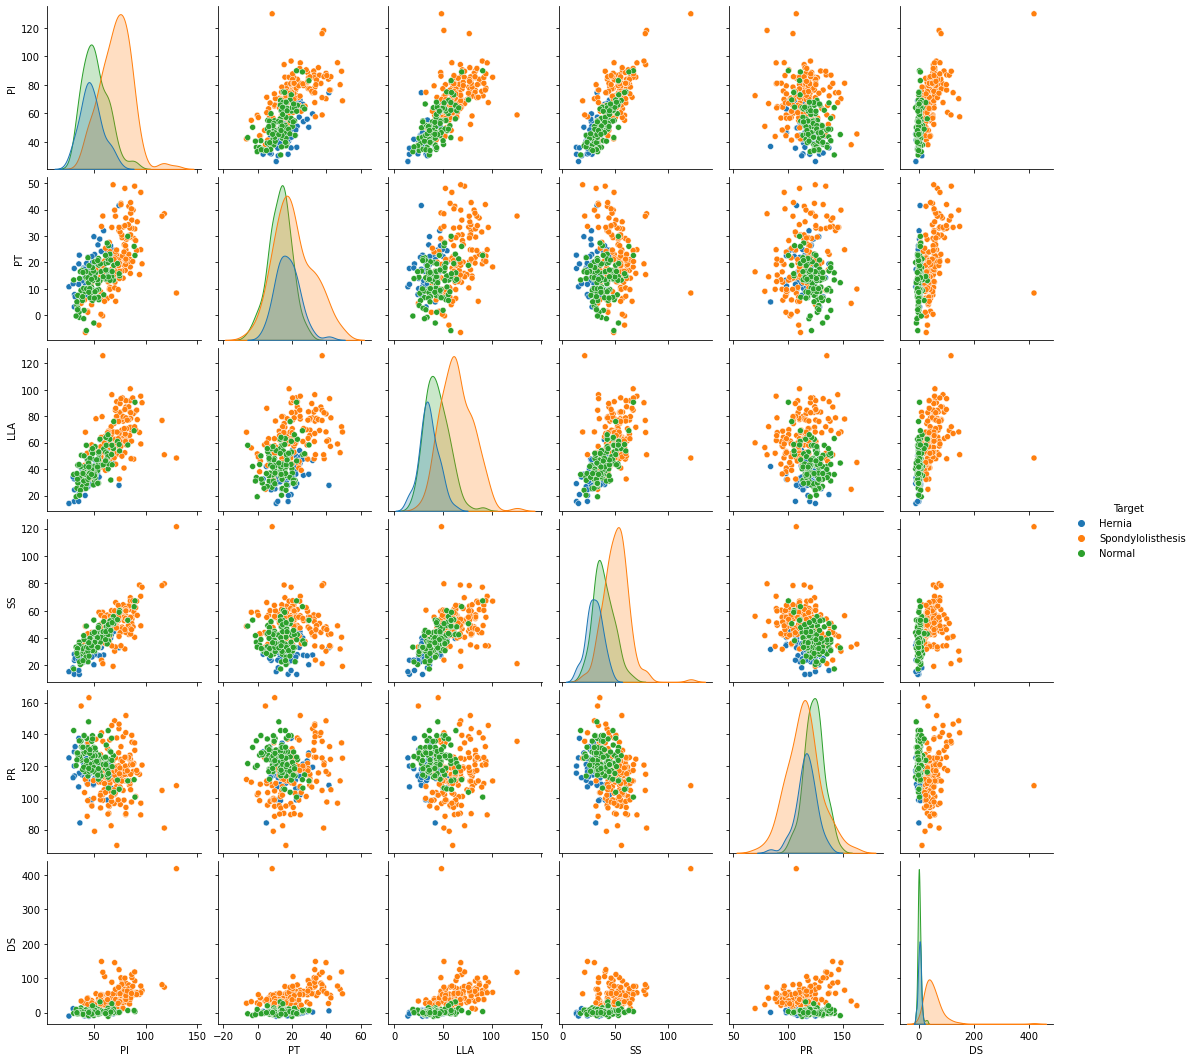

In [9]:
sns.pairplot(data, hue="Target")

On a 310 observations dans notre dataset, on se rend compte que les 3 classes (Hernia, Normal et Spondylolisthesis) ne sont pas équilibrés. L'affichage de 2 dimensions ne nous permet pas de faire une distinction claire entre les 3 classes.
Pour certaines variables, on remarque que les 3 classes ont la même loi de distribution (c'est le cas pour les 2 variables :inclinaison du bassin et rayon pelvien).

# 3] 1er essai de prédiction (avec Random Forest)

In [10]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [11]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [12]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8924731182795699


Avec un simple modèle de random forest (100 estimateurs),nous avons de bonne performances. Le projet est donc
viable, et que donc il y a un intérêt à aller plus loin et à le déployer en production.  

## 4] La modélisation avec mlflow 

In [13]:
def accuracymeasures(y_test,predictions,avg_method):
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average=avg_method)
    recall = recall_score(y_test, predictions, average=avg_method)
    f1score = f1_score(y_test, predictions, average=avg_method)
    target_names = ['0','1','2']
    print("Classification report")
    print("---------------------","\n")
    print(classification_report(y_test, predictions,target_names=target_names),"\n")
    print("Confusion Matrix")
    print("---------------------","\n")
    print(confusion_matrix(y_test, predictions),"\n")

    print("Accuracy Measures")
    print("---------------------","\n")
    print("Accuracy: ", accuracy)
    print("Precision: ", precision)
    print("Recall: ", recall)
    print("F1 Score: ", f1score)
    
    return accuracy,precision,recall,f1score

In [14]:
max_depth = 5
n_estimators = 5

n_neighbors = 5


remote_server_uri = 'http://localhost:1234'

mlflow.set_tracking_uri(remote_server_uri)
mlflow.set_experiment('Vertebral')

with mlflow.start_run(run_name='knn') as mlops_run:
    #model = RandomForestClassifier(max_depth=max_depth,n_estimators=n_estimators)
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy,precision,recall,f1score = accuracymeasures(y_test,y_pred,'weighted')

    #mlflow.log_param("max_depth",max_depth)
    #mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("n_neighbors", n_neighbors)

    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1score)

    tracking_url_type_store = urlparse(mlflow.get_artifact_uri()).scheme

    if tracking_url_type_store != "file":
        mlflow.sklearn.log_model(
            model, 
            "model", 
            registered_model_name='knn_model')
    else:
        mlflow.sklearn.load_model(model, "model")

2022/06/07 22:43:39 INFO mlflow.tracking.fluent: Experiment with name 'Vertebral' does not exist. Creating a new experiment.


Classification report
--------------------- 

              precision    recall  f1-score   support

           0       0.81      0.76      0.79        17
           1       0.81      0.84      0.82        25
           2       0.98      0.98      0.98        51

    accuracy                           0.90        93
   macro avg       0.87      0.86      0.86        93
weighted avg       0.90      0.90      0.90        93
 

Confusion Matrix
--------------------- 

[[13  4  0]
 [ 3 21  1]
 [ 0  1 50]] 

Accuracy Measures
--------------------- 

Accuracy:  0.9032258064516129
Precision:  0.9032775020678246
Recall:  0.9032258064516129
F1 Score:  0.903034136430721


Successfully registered model 'knn_model'.
2022/06/07 22:44:22 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: knn_model, version 1
Created version '1' of model 'knn_model'.


Il suffit maintenant d'aller dans http://localhost:1234, on observera le nom de notre modèleve avec les performances obtenues.